# a)

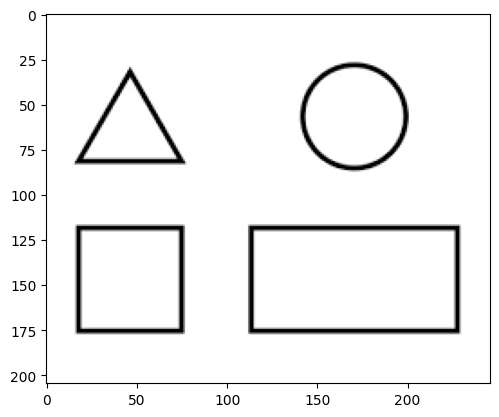

In [24]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/Q7.png', 0)
plt.imshow(img, cmap = 'gray')
plt.show()

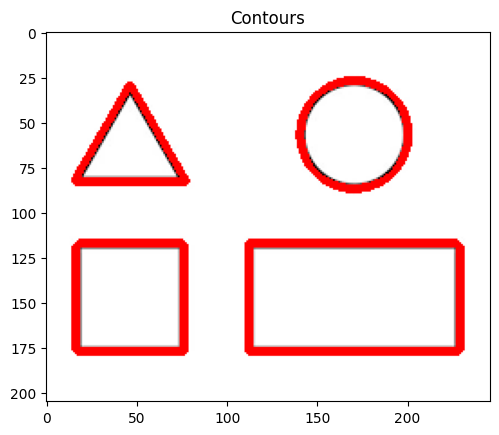

In [38]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
  
# Let's load a simple image with 3 black squares
image = cv2.imread('images/Q7.png')
cv2.waitKey(0)
  
# Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
# Find Canny edges
edged = cv2.Canny(gray, 30, 200)
cv2.waitKey(0)
  
contours, hierarchy = cv2.findContours(edged, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  
# Draw all contours
# -1 signifies drawing all contours
cv2.drawContours(image, contours, -1, (255, 0, 0), 3)
  
plt.imshow(image, cmap = 'gray')
plt.title('Contours')
plt.show()